In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
new_pieman_word = niidb.FMriActivationsDb('data/new_pieman_word.db',
                                      mask='/home/eli/Documents/new_pieman/word/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(new_pieman_word.all()), num_factors=30,
                                                  mask='/home/eli/Documents/new_pieman/word/wholebrain.nii.gz')

05/08/2018 10:09:57 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-39-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
05/08/2018 10:10:01 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-45-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
05/08/2018 10:10:05 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-48-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
05/08/2018 10:10:09 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-11-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
05/08/2018 10:10:13 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-43-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
05/08/2018 10:10:17 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-30-task-word.nii with mask /home/eli/Document

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


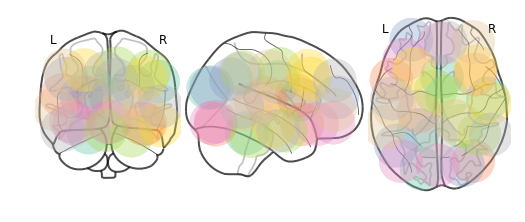

In [6]:
htfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


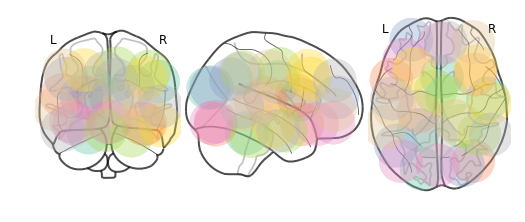

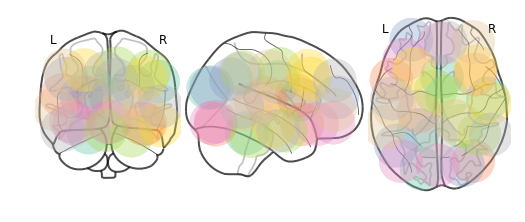

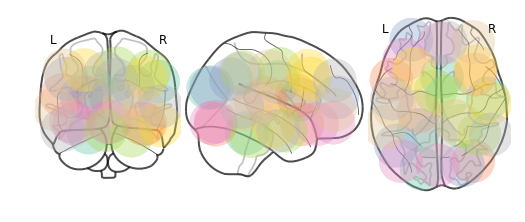

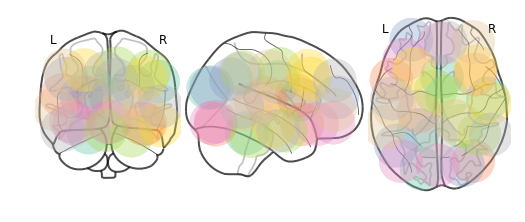

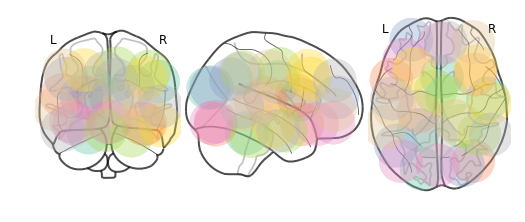

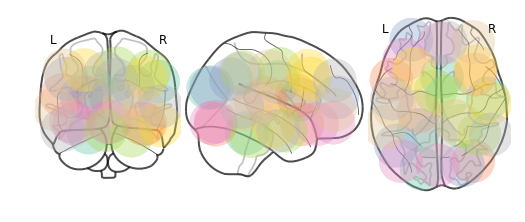

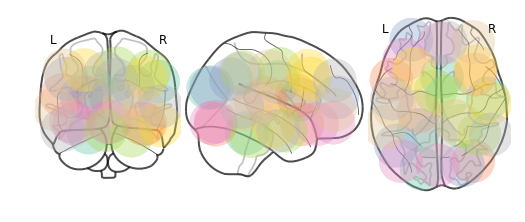

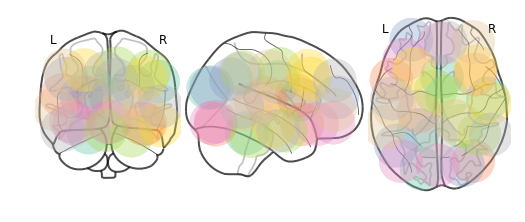

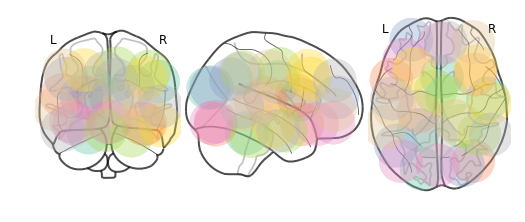

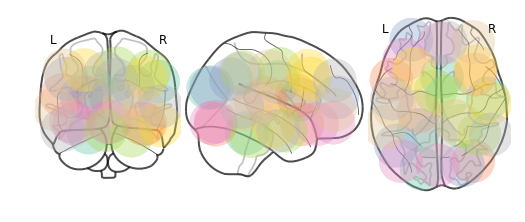

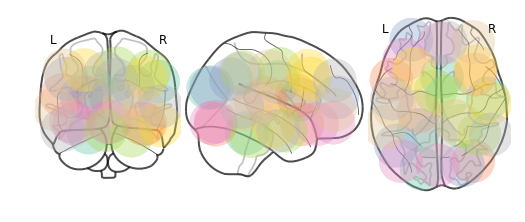

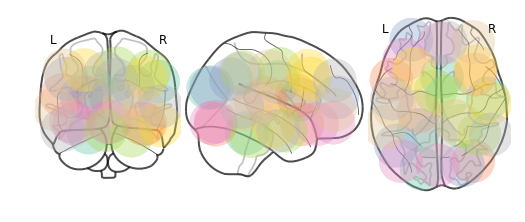

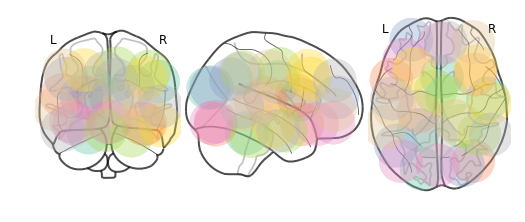

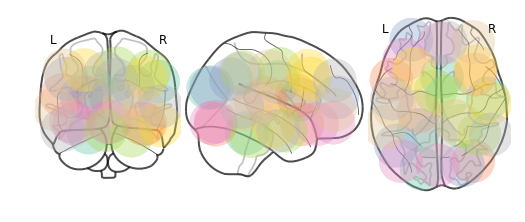

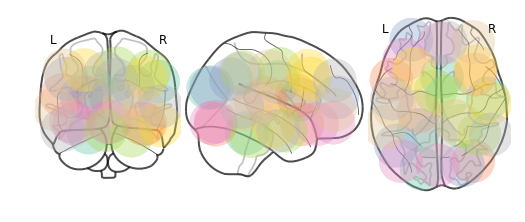

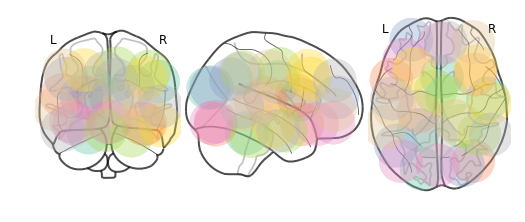

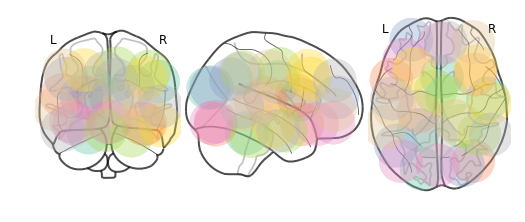

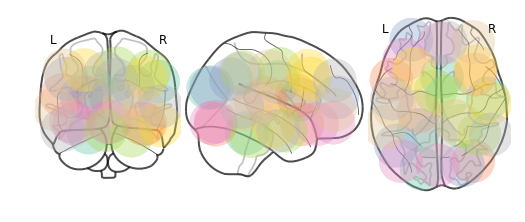

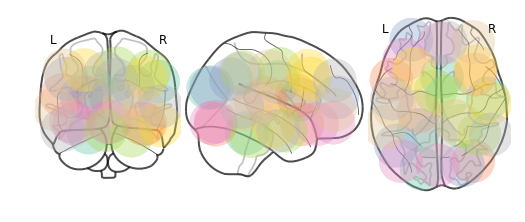

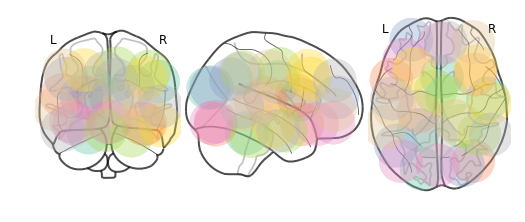

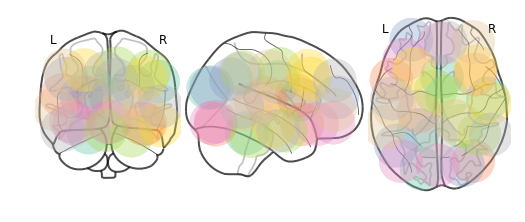

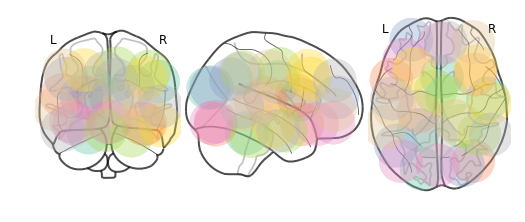

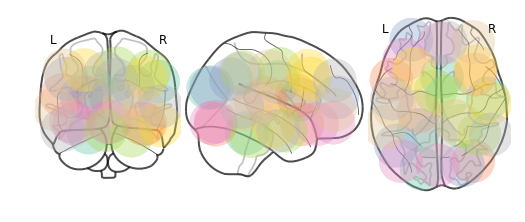

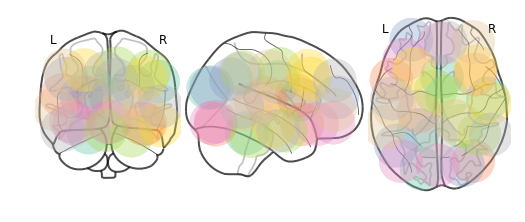

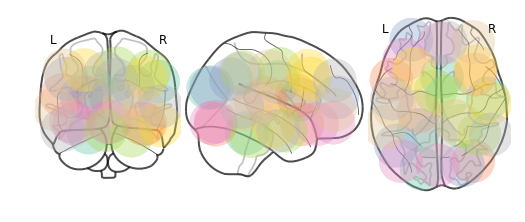

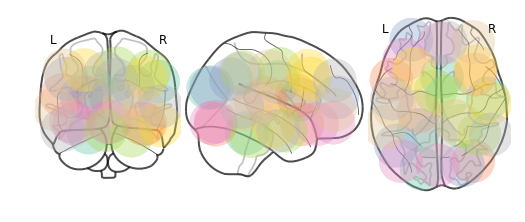

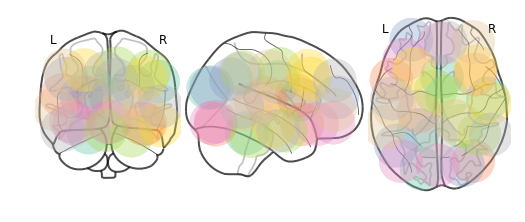

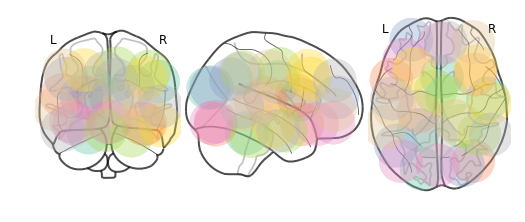

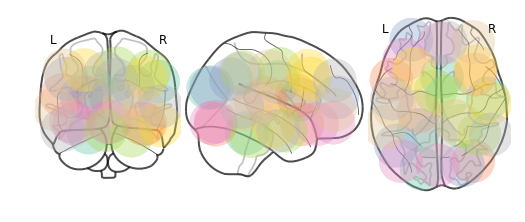

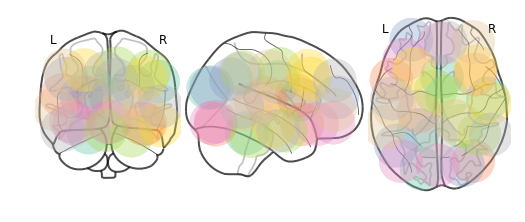

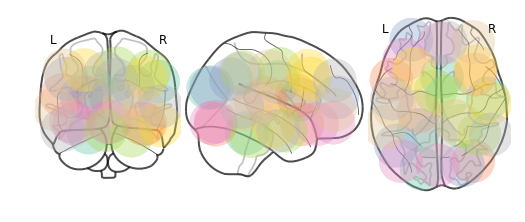

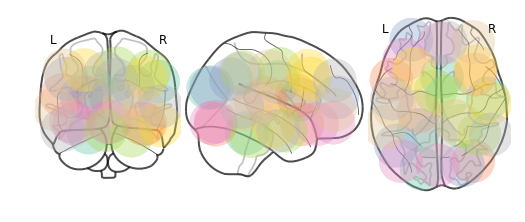

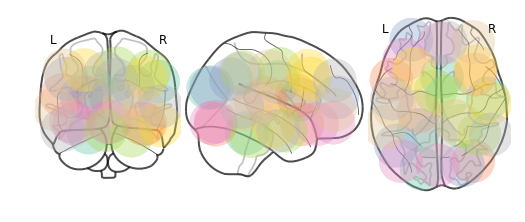

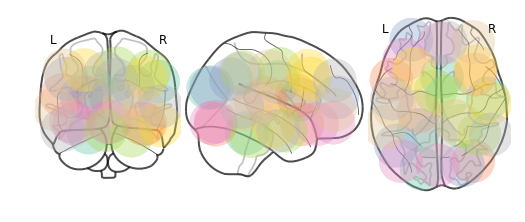

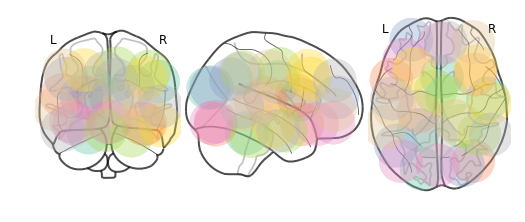

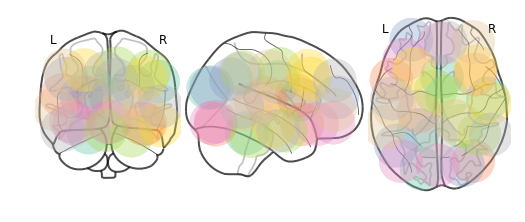

In [7]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)

In [8]:
losses = htfa.train(num_steps=700, learning_rate=5e-3, log_level=logging.INFO, num_particles=4,
                    batch_size=50, use_cuda=True, blocks_batch_size=2)

05/08/2018 10:15:33 [Epoch 1] (14061ms) Posterior free-energy 1.50029520e+12
05/08/2018 10:15:46 [Epoch 2] (12665ms) Posterior free-energy 1.22973952e+12
05/08/2018 10:15:59 [Epoch 3] (12738ms) Posterior free-energy 1.03074274e+12
05/08/2018 10:16:11 [Epoch 4] (12724ms) Posterior free-energy 8.76370067e+11
05/08/2018 10:16:24 [Epoch 5] (12956ms) Posterior free-energy 7.62793034e+11
05/08/2018 10:16:38 [Epoch 6] (13221ms) Posterior free-energy 6.73232126e+11
05/08/2018 10:16:51 [Epoch 7] (13216ms) Posterior free-energy 6.02868744e+11
05/08/2018 10:17:04 [Epoch 8] (13128ms) Posterior free-energy 5.39756921e+11
05/08/2018 10:17:17 [Epoch 9] (12927ms) Posterior free-energy 4.93152698e+11
05/08/2018 10:17:30 [Epoch 10] (13618ms) Posterior free-energy 4.52969366e+11
05/08/2018 10:17:44 [Epoch 11] (13378ms) Posterior free-energy 4.17982317e+11
05/08/2018 10:17:58 [Epoch 12] (13748ms) Posterior free-energy 3.90399394e+11
05/08/2018 10:18:13 [Epoch 13] (15140ms) Posterior free-energy 3.66560870

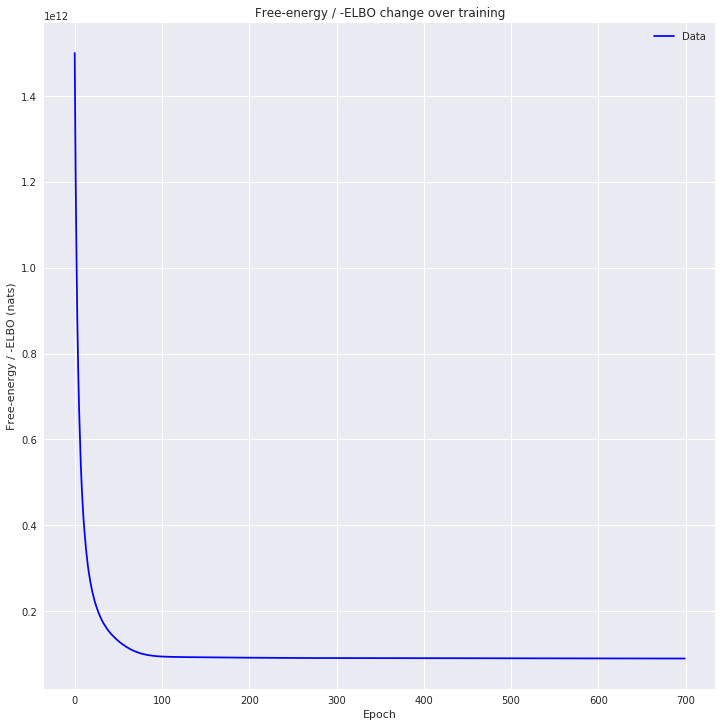

In [9]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


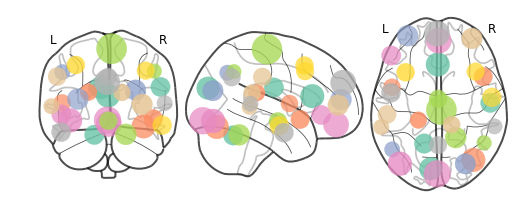

In [10]:
htfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


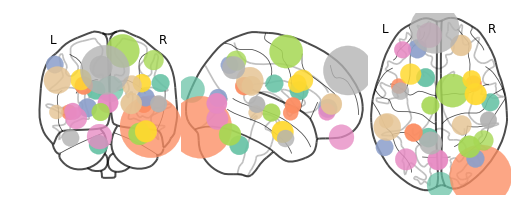

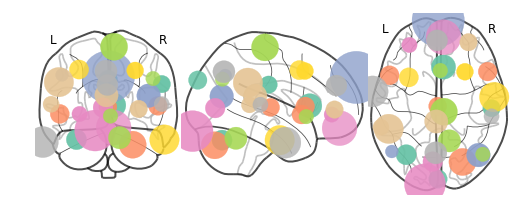

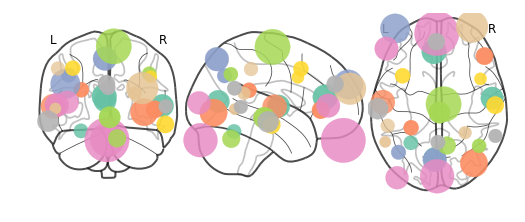

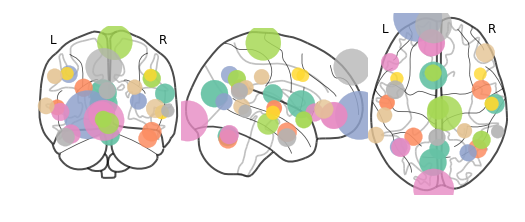

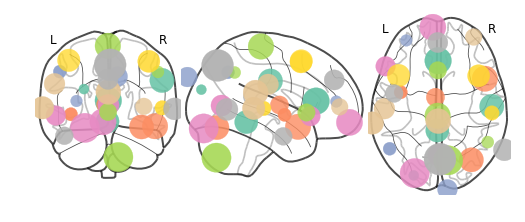

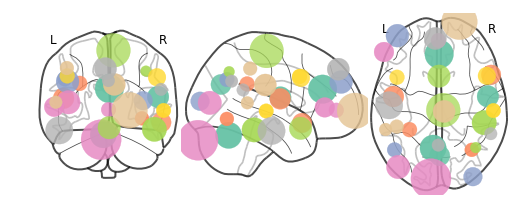

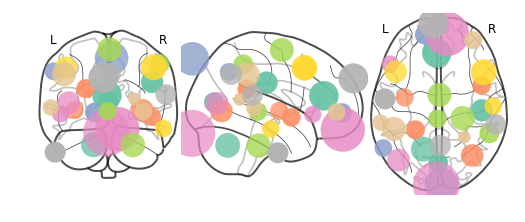

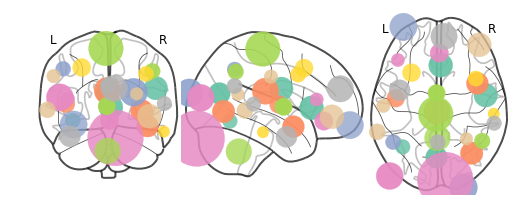

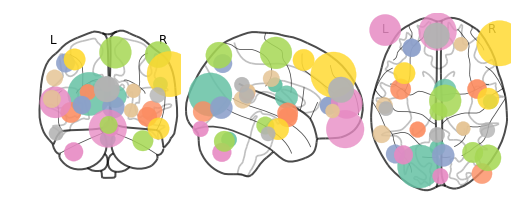

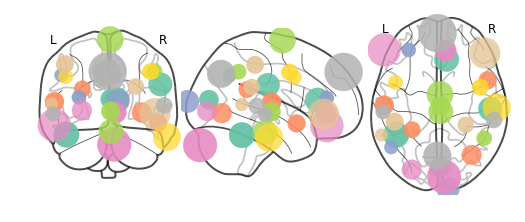

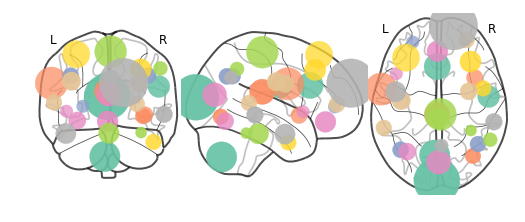

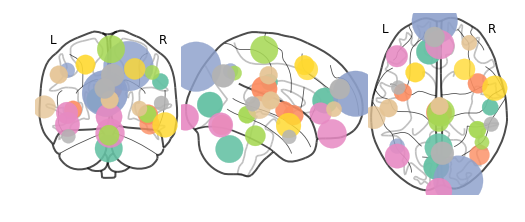

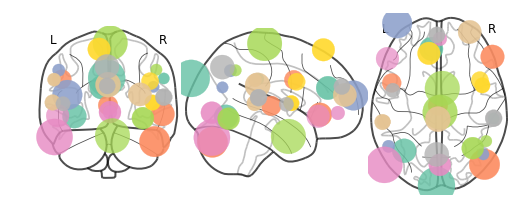

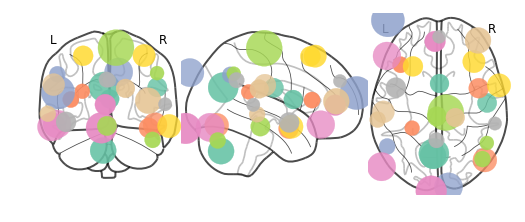

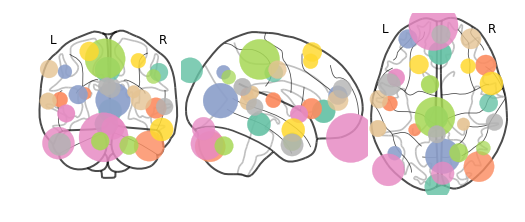

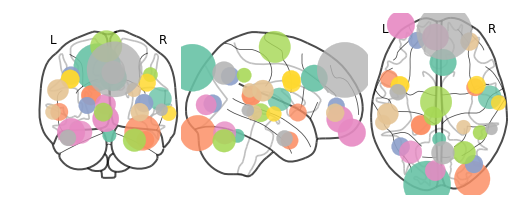

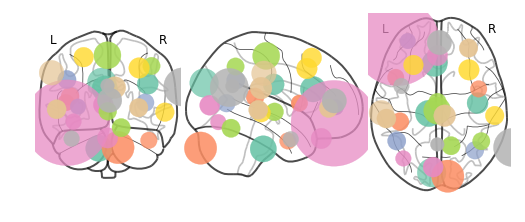

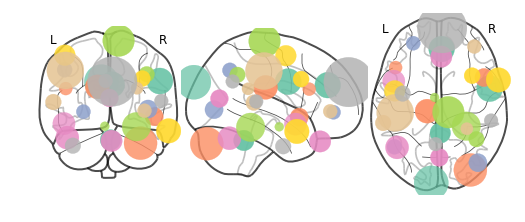

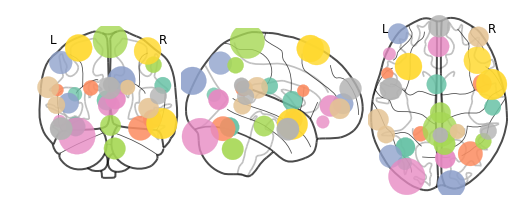

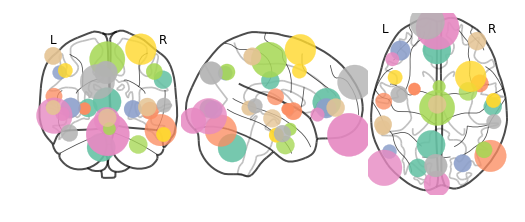

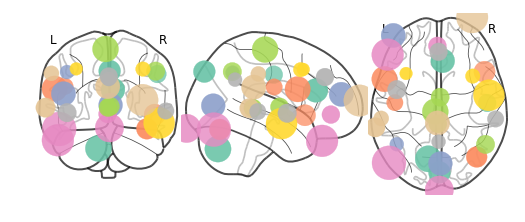

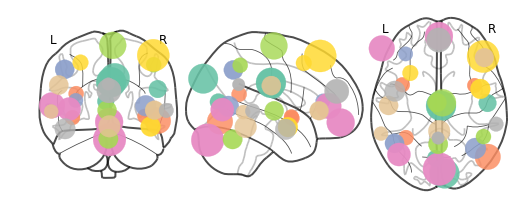

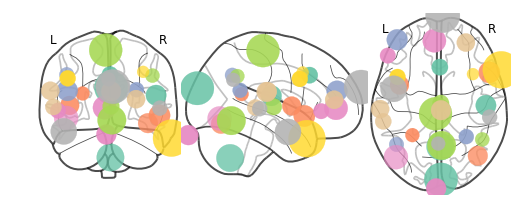

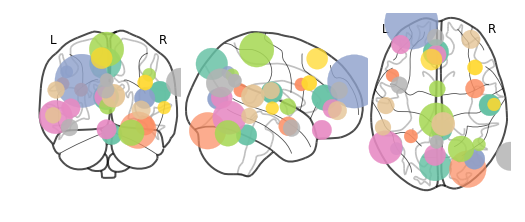

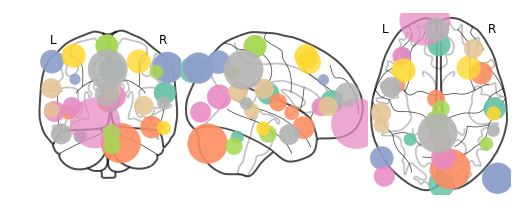

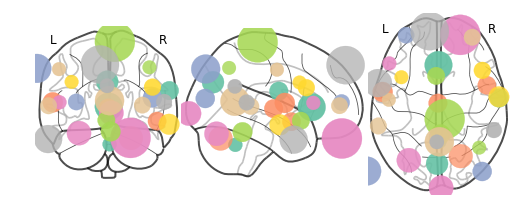

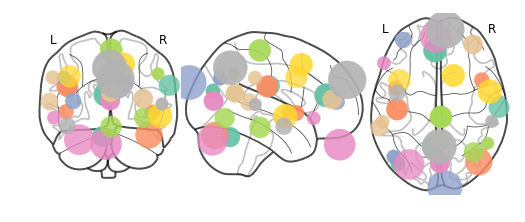

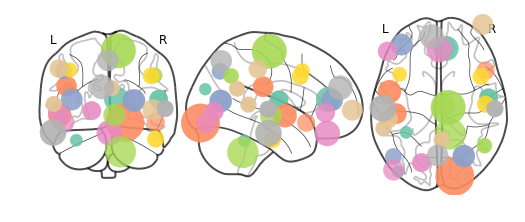

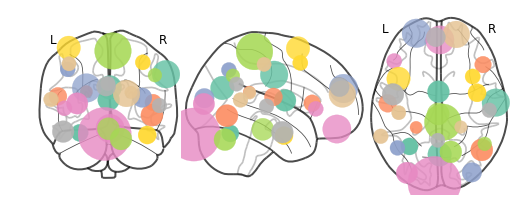

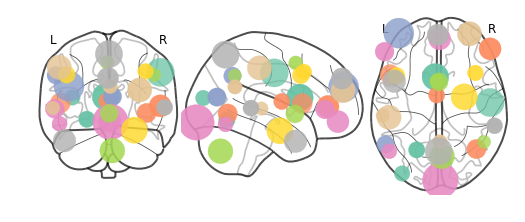

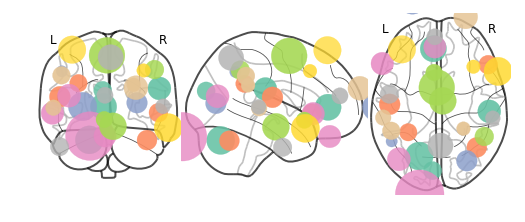

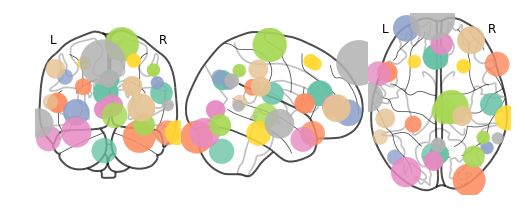

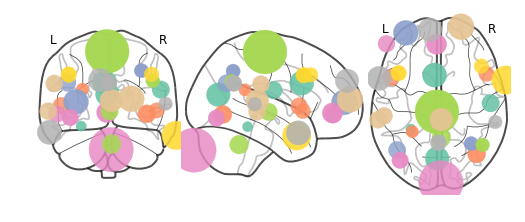

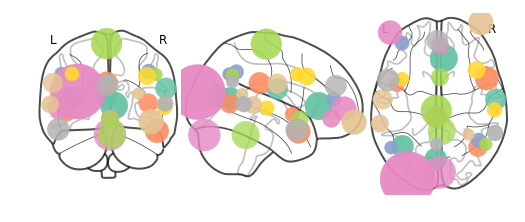

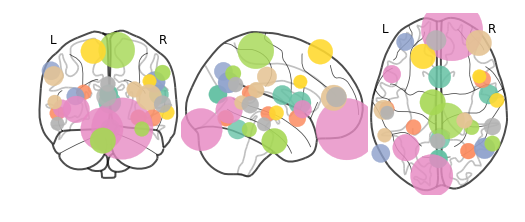

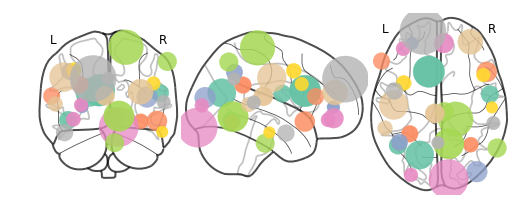

In [11]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)